In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the dataset
df = pd.read_csv("Heart_Disease_Prediction.csv")

In [4]:
# Drop rows with missing values
df = df.dropna()

In [5]:
# Encode categorical features
le = LabelEncoder()
df["Heart Disease"] = le.fit_transform(df["Heart Disease"])

In [6]:
# Separate features and target variables
X = df.drop("Heart Disease", axis=1)
y = df["Heart Disease"]

In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Train the Random Forest classifier with more estimators
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [9]:
# Print the feature importance scores
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

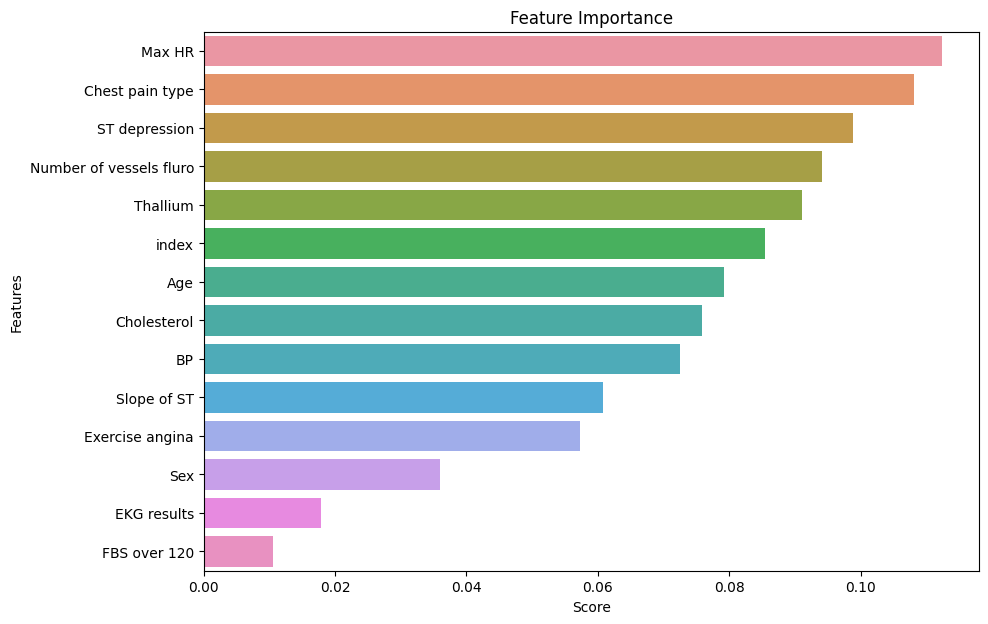

In [10]:
# Visualize the feature importance
plt.figure(figsize=(10, 7))
sns.barplot(x=importances[indices], y=X_train.columns[indices])
plt.title("Feature Importance")
plt.xlabel("Score")
plt.ylabel("Features")
plt.show()

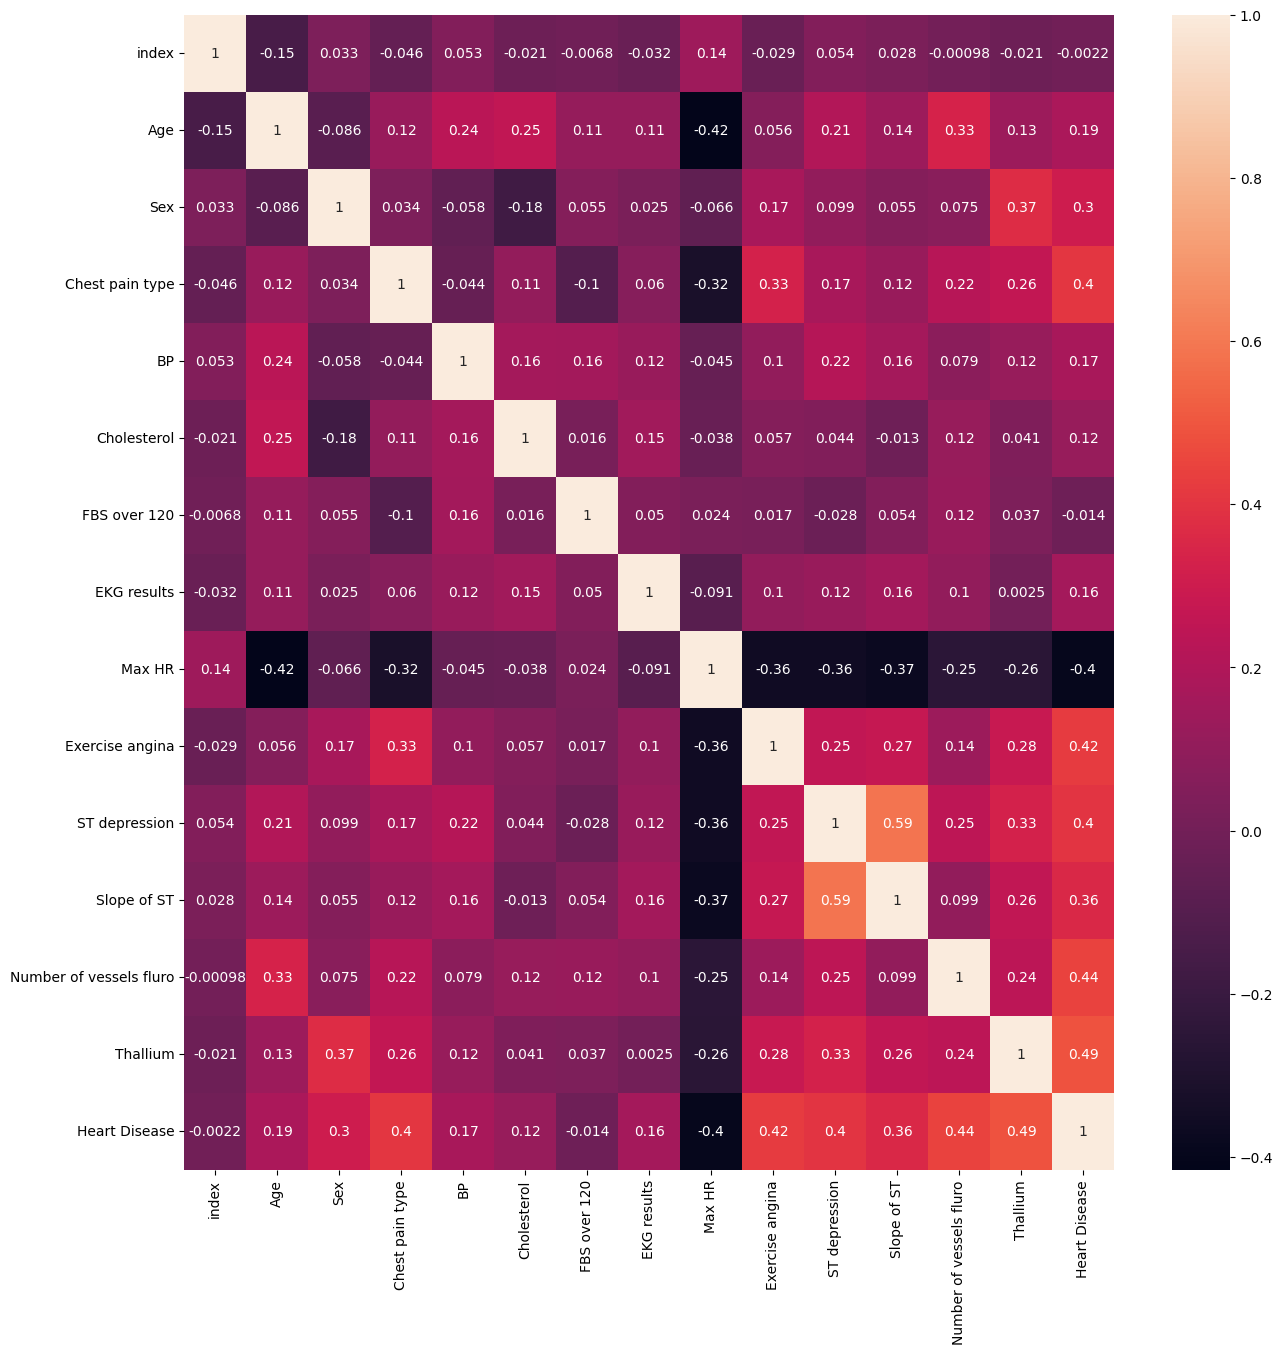

In [11]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [12]:
# Make predictions on the testing data
y_pred = clf.predict(X_test)

In [13]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8421052631578947


In [14]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.91      0.75      0.82        28

    accuracy                           0.84        57
   macro avg       0.85      0.84      0.84        57
weighted avg       0.85      0.84      0.84        57



In [15]:
# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[27  2]
 [ 7 21]]
